In [2]:
import numpy as np
import material as ml
import thinfilm as tm
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

wl = np.linspace(400, 700, 301)
air = ml.Non_Dispersion(1)
SiO2 = ml.open_material('SiO2_Nanya', 'Material')
NB = ml.open_material('Nb2O5_Nanya', 'Material')
ITO2 = ml.open_material('ITO_Nanya', 'Material')
ITO1 = ml.open_material('ITO1_Nanya', 'Material')
OC = ml.open_material('OC_Nanya', 'Material')
sodalime_Nanya = ml.open_material('sodalime_Nanya', 'Material')

hypo_bri = lambda th: tm.Design(
    [air, SiO2, ITO2, OC, ITO1, SiO2, NB, sodalime_Nanya],
    [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
).reflectance(wl)

hypo_dia = lambda th: tm.Design(
    [air, SiO2, ITO2, SiO2, NB, sodalime_Nanya],
    [None, th[0], th[1], th[4], th[5], None]
).reflectance(wl)

hypo_tra = lambda th: tm.Design(
    [air, SiO2, SiO2, NB, sodalime_Nanya],
    [None, th[0], th[4], th[5], None]
).reflectance(wl)

delta_d_b = lambda th: np.mean(abs(hypo_bri(th)-hypo_dia(th)))
delta_d_t = lambda th: np.mean(abs(hypo_tra(th)-hypo_dia(th)))

fom = lambda th: delta_d_b(th)+delta_d_t(th)
fom_dt = lambda th: delta_d_t(th)

In [15]:
res = differential_evolution(
    fom, [
        (60,90),(28,32),(1200,1201),(70,80),(6,60),(6,60)
    ], disp=True, polish=False, popsize=20, mutation=0.3, recombination =0.9,strategy = 'rand1exp'
)
print(res.x)

differential_evolution step 1: f(x)= 0.0287844
differential_evolution step 2: f(x)= 0.0287844
differential_evolution step 3: f(x)= 0.0274108
differential_evolution step 4: f(x)= 0.0274108
differential_evolution step 5: f(x)= 0.0274108
differential_evolution step 6: f(x)= 0.0274108
differential_evolution step 7: f(x)= 0.0270615
differential_evolution step 8: f(x)= 0.0270615
differential_evolution step 9: f(x)= 0.0270615
differential_evolution step 10: f(x)= 0.0270615
differential_evolution step 11: f(x)= 0.0270615
differential_evolution step 12: f(x)= 0.0270615
differential_evolution step 13: f(x)= 0.0270615
differential_evolution step 14: f(x)= 0.0270615
differential_evolution step 15: f(x)= 0.0270093
differential_evolution step 16: f(x)= 0.0270093
differential_evolution step 17: f(x)= 0.0270093
[  89.94908356   31.19919036 1200.36061398   77.66160114   33.36253678
    9.35951006]


bridge: 0.0
pattern: 0.00048491785389475944


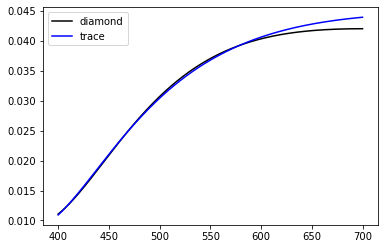

In [7]:
f2 = [60.00667853,20.06990225,0.,0.,29.93616242,6.25600494]
tk = f2

plt.plot(wl, hypo_dia(tk), 'k-', label = 'diamond')
#plt.plot(wl, hypo_bri(tk), 'r-', label = 'bridge')
plt.plot(wl, hypo_tra(tk), 'b-', label = 'trace')
plt.legend(loc = 'best')
print('bridge:',delta_d_b(tk))
print('pattern:',delta_d_t(tk))
plt.show()

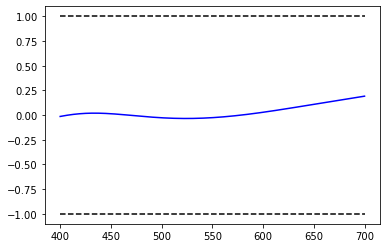

In [6]:
plt.plot(wl, 100*(hypo_tra(f2)-hypo_dia(f2)), '-b')
plt.plot(wl, np.ones(np.size(wl)), '--k')
plt.plot(wl, -np.ones(np.size(wl)), '--k')
plt.show()

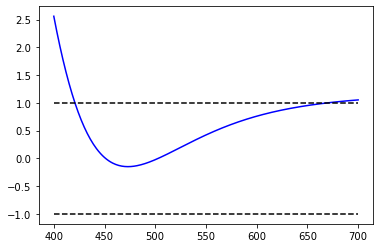

In [24]:
plt.plot(wl, 100*(hypo_tra(tk)-hypo_dia(tk)), '-b')
plt.plot(wl, np.ones(np.size(wl)), '--k')
plt.plot(wl, -np.ones(np.size(wl)), '--k')
plt.show()

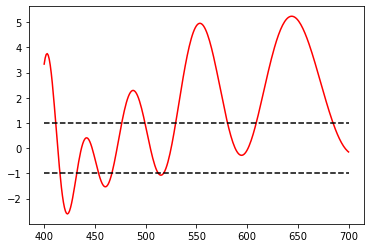

In [25]:
plt.plot(wl, 100*(hypo_bri(tk)-hypo_dia(tk)), '-r')
plt.plot(wl, np.ones(np.size(wl)), '--k')
plt.plot(wl, -np.ones(np.size(wl)), '--k')
plt.show()